In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy import optimize

from datetime import timedelta

In [2]:
data = pd.read_csv('data/COVID-19-Cleaned-with-Population.csv')
data['date'] = pd.to_datetime(data['date'])

# remove rows with 0 confirmed cases
data = data.query('cumulative_confirmed > 0').reset_index(drop=True)

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population
0,Afghanistan,2020-02-24,1,1,0,0,1,1,0,0,37172386.0
1,Afghanistan,2020-02-25,1,1,0,0,0,0,0,0,37172386.0
2,Afghanistan,2020-02-26,1,1,0,0,0,0,0,0,37172386.0
3,Afghanistan,2020-02-27,1,1,0,0,0,0,0,0,37172386.0
4,Afghanistan,2020-02-28,1,1,0,0,0,0,0,0,37172386.0


In [3]:
# data = data.merge(populations, on='region', how='left')

for column in data.columns:
    if column not in {'date', 'region', 'population'}:
        data['{}_rate_per_million'.format(column)] = 1e6 * (data[column] / data['population'])

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million
0,Afghanistan,2020-02-24,1,1,0,0,1,1,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.026902,0.026902,0.0,0.0
1,Afghanistan,2020-02-25,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0
2,Afghanistan,2020-02-26,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Afghanistan,2020-02-27,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Afghanistan,2020-02-28,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0


In [4]:
data['region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guadeloupe', 'Guatemala', 'Guernsey', 'Guinea',
       'Guyana', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',


In [5]:
reference_countries = ['China', 'Italy', 'Iran', 'Canada', 'United Kingdom', 'US']
na_countries = ['US', 'Canada', 'Mexico']
eu_countries = ['Italy', 'United Kingdom', 'France', 'Sweden', 'Switzerland', 'Spain', 'Germany']
asian_countries = ['Japan', 'China', 'Taiwan*', 'Thailand', 'Korea, South']

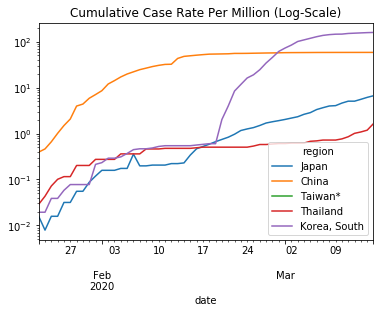

In [6]:
data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[asian_countries].plot(logy=True, title='Cumulative Case Rate Per Million (Log-Scale)')

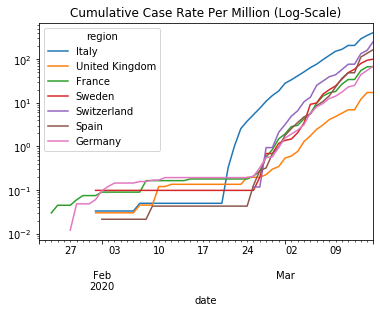

In [7]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=True, title='Cumulative Case Rate Per Million (Log-Scale)')

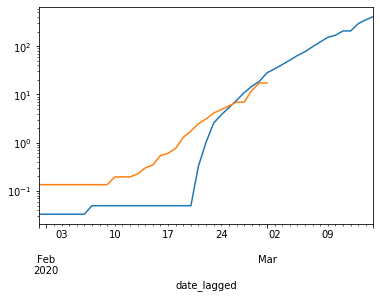

In [8]:
ax = data.query('region == "Italy"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False)

df = data.query('region == "United Kingdom"').copy()
df['date_lagged'] = df['date'].shift(14)
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False)


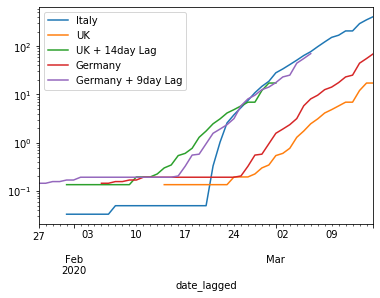

In [10]:
ax = data.query('region == "Italy"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='Italy')

df = data.query('region == "United Kingdom"').copy()
df['date_lagged'] = df['date'].shift(14)
df.dropna().plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='UK')
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='UK + 14day Lag')
# ax = data.query('region == "South Korea"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='South Korea', ax=ax)
# ax = data.query('region == "Mainland China"').plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, legend=False, label='China', ax=ax)


df = data.query('region == "Germany"').copy()
df['date_lagged'] = df['date'].shift(9)
df.dropna().plot(x='date', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='Germany')
df.dropna().plot(x='date_lagged', y='cumulative_confirmed_rate_per_million', logy=True, ax=ax, legend=False, label='Germany + 9day Lag')

plt.legend()

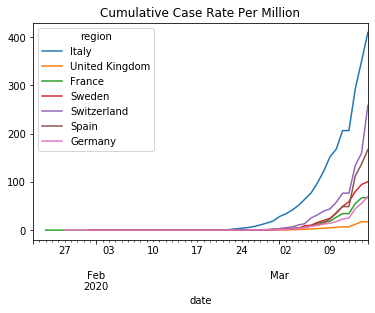

In [11]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=False, title='Cumulative Case Rate Per Million')

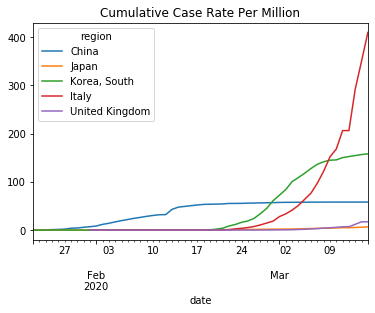

In [12]:
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[['China', 'Japan', 'Korea, South', 'Italy', 'United Kingdom']].plot(logy=False, title='Cumulative Case Rate Per Million')

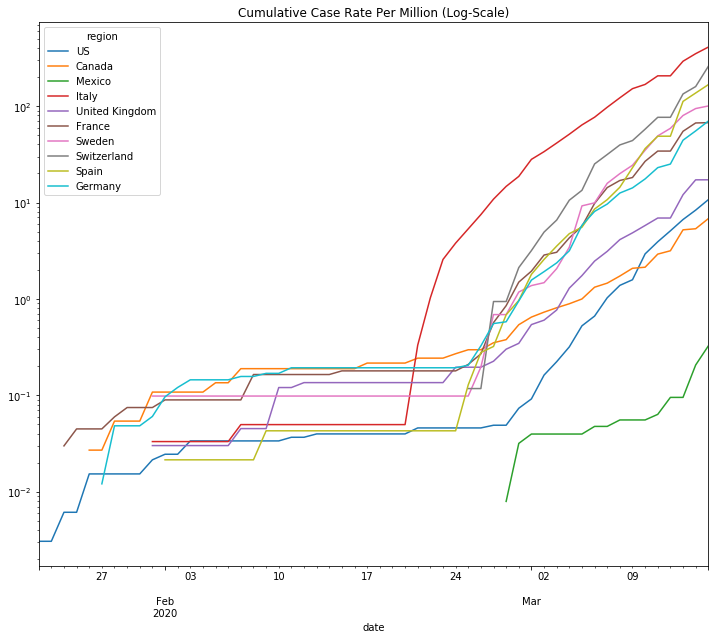

In [13]:
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot()
ax = data.pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[na_countries + eu_countries].plot(
    logy=True, title='Cumulative Case Rate Per Million (Log-Scale)', ax=ax)

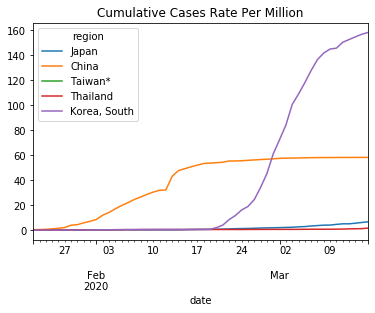

In [14]:
data.query('cumulative_confirmed > 0').pivot(
    index='date', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[asian_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [15]:
first_infection_date = data.groupby('region')['date'].min()
first_death_date = data.query('cumulative_deaths > 0').groupby('region')['date'].min()

In [16]:
time_to_death = first_death_date - first_infection_date

time_to_death

region
Afghanistan               NaT
Albania                2 days
Algeria               16 days
Andorra                   NaT
Antigua and Barbuda       NaT
                        ...  
Uruguay                   NaT
Uzbekistan                NaT
Vatican City              NaT
Venezuela                 NaT
Vietnam                   NaT
Name: date, Length: 146, dtype: timedelta64[ns]

/Users/miroslaw/anaconda/envs/covid19/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/miroslaw/anaconda/envs/covid19/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([8., 5., 8., 9., 2., 4., 1., 2., 3., 5.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

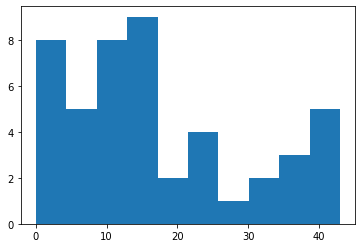

In [17]:
plt.hist(time_to_death.dt.days)

In [18]:
data.groupby('date')['cumulative_deaths'].sum() / data.groupby('date')['cumulative_confirmed'].sum() 

date
2020-01-22    0.030631
2020-01-23    0.027565
2020-01-24    0.027630
2020-01-25    0.029289
2020-01-26    0.026440
2020-01-27    0.028015
2020-01-28    0.023485
2020-01-29    0.021570
2020-01-30    0.020768
2020-01-31    0.021457
2020-02-01    0.021515
2020-02-02    0.021564
2020-02-03    0.021427
2020-02-04    0.020593
2020-02-05    0.020409
2020-02-06    0.020573
2020-02-07    0.020907
2020-02-08    0.021713
2020-02-09    0.022565
2020-02-10    0.023689
2020-02-11    0.024843
2020-02-12    0.024723
2020-02-13    0.022711
2020-02-14    0.022770
2020-02-15    0.024134
2020-02-16    0.024851
2020-02-17    0.025499
2020-02-18    0.026712
2020-02-19    0.028054
2020-02-20    0.029489
2020-02-21    0.029301
2020-02-22    0.031281
2020-02-23    0.031267
2020-02-24    0.033056
2020-02-25    0.033691
2020-02-26    0.034049
2020-02-27    0.034022
2020-02-28    0.034160
2020-02-29    0.034211
2020-03-01    0.033920
2020-03-02    0.034179
2020-03-03    0.034054
2020-03-04    0.034226
2020-0

In [20]:
death_rate_per_country = (data.groupby(['date', 'region'])['cumulative_deaths'].sum() / data.groupby(['date', 'region'])['cumulative_confirmed'].sum())['2020-03-10']

death_rate_per_country[death_rate_per_country > 0] * 100

region
Argentina          5.882353
Australia          2.803738
Canada             1.265823
China              3.880722
Cruise Ship        0.862069
Egypt              1.694915
France             1.841518
Germany            0.137268
Iran               3.618503
Iraq               9.859155
Italy              6.217361
Japan              1.721170
Korea, South       0.718754
Lebanon            2.439024
Morocco           33.333333
Netherlands        1.047120
Philippines        3.030303
San Marino         3.921569
Spain              2.064897
Switzerland        0.610998
Taiwan*            2.127660
Thailand           1.886792
US                 2.919708
United Kingdom     1.562500
dtype: float64

In [21]:
surv = data.groupby(['region', 'date'])['cumulative_confirmed'].sum()  - data.groupby(['region', 'date'])['cumulative_deaths'].sum()
dead = data.groupby(['region', 'date'])['cumulative_deaths'].sum()

In [22]:
from scipy import stats

stats.beta(dead['Korea, South'].max() + 1, surv['Korea, South'].max() + 1 ).interval(0.95)

(0.007342273962538534, 0.011503553094112329)

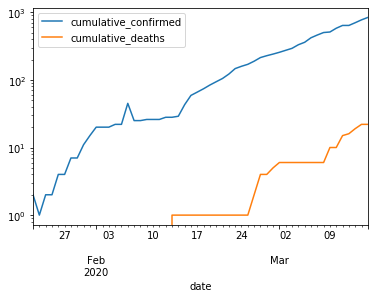

In [23]:
df = data.query('region == "Japan"')

df.plot(x='date', y=['cumulative_confirmed', 'cumulative_deaths'], logy=True)


In [24]:
def plot_country_lagged_deaths(data, country, lag=0, ax=None):
    df = data.query('region == "{}"'.format(country)).copy()
    df['date_lagged'] = df['date'].shift(lag)
    ax = df.plot(
        x='date_lagged', 
        y='cumulative_deaths', 
        logy=True, 
        ax=ax, 
        title='{} Covid Cases'.format(country),
        label='cumulative_deaths - {} day lag'.format(lag)
    )
    
    ax = df.plot(
        x='date', 
        y=['cumulative_confirmed', 'cumulative_deaths'], 
        logy=True, 
        ax=ax, 
        title='{} Covid Cases'.format(country)
    )
    
    return ax

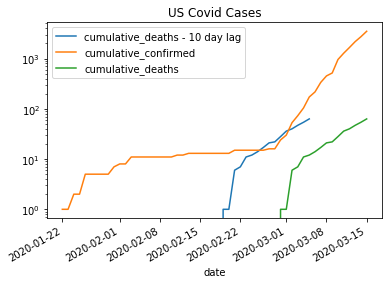

In [31]:
plot_country_lagged_deaths(data, 'US', lag=10)

In [32]:
data.groupby('region')['cumulative_confirmed'].max().sort_values()[-15:]

region
Denmark             875
Belgium             886
Sweden             1022
Netherlands        1135
United Kingdom     1144
Norway             1221
Switzerland        2200
US                 3499
France             4513
Germany            5795
Spain              7798
Korea, South       8162
Iran              13938
Italy             24747
China             81003
Name: cumulative_confirmed, dtype: int64

In [33]:
data.groupby('region')['cumulative_deaths'].max().sort_values()[-15:]

region
Cruise Ship          7
Iraq                10
Germany             11
Philippines         11
Switzerland         14
Netherlands         20
United Kingdom      21
Japan               22
US                  63
Korea, South        75
France              91
Spain              289
Iran               724
Italy             1809
China             3203
Name: cumulative_deaths, dtype: int64

In [34]:
first_infection_date

region
Afghanistan           2020-02-24
Albania               2020-03-09
Algeria               2020-02-25
Andorra               2020-03-02
Antigua and Barbuda   2020-03-13
                         ...    
Uruguay               2020-03-14
Uzbekistan            2020-03-15
Vatican City          2020-03-06
Venezuela             2020-03-14
Vietnam               2020-01-23
Name: date, Length: 146, dtype: datetime64[ns]

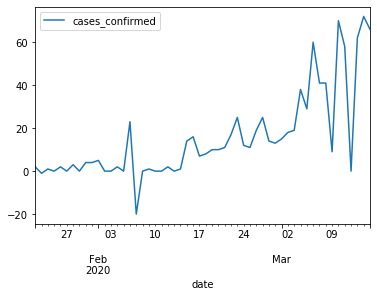

In [37]:
data.query('region == "Japan"').plot(x='date', y='cases_confirmed')

In [38]:
data = data.set_index('region')

data['t'] = (data['date'] - first_infection_date).dt.days

data = data.reset_index()

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,population,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t
0,Afghanistan,2020-02-24,1,1,0,0,1,1,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.026902,0.026902,0.0,0.0,0
1,Afghanistan,2020-02-25,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,1
2,Afghanistan,2020-02-26,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,2
3,Afghanistan,2020-02-27,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,3
4,Afghanistan,2020-02-28,1,1,0,0,0,0,0,0,37172386.0,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,4


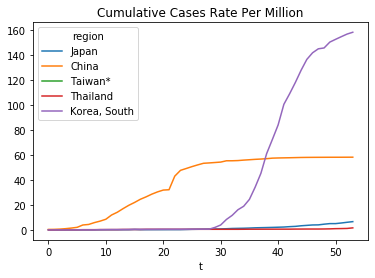

In [39]:
data.pivot(
    index='t', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[asian_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [40]:
first_date_at_least_rate_over_1 = data.query('cumulative_confirmed_rate_per_million > 0').groupby('region')['date'].min()

In [41]:
first_date_at_least_rate_over_1

region
Afghanistan            2020-02-24
Albania                2020-03-09
Algeria                2020-02-25
Andorra                2020-03-02
Antigua and Barbuda    2020-03-13
                          ...    
United Arab Emirates   2020-01-29
United Kingdom         2020-01-31
Uruguay                2020-03-14
Uzbekistan             2020-03-15
Vietnam                2020-01-23
Name: date, Length: 133, dtype: datetime64[ns]

In [42]:
data = data.set_index('region')

data['t_at_rate_over_1'] = (data['date'] - first_date_at_least_rate_over_1).dt.days

data = data.reset_index()

data.head()

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
0,Afghanistan,2020-02-24,1,1,0,0,1,1,0,0,...,0.026902,0.026902,0.0,0.0,0.026902,0.026902,0.0,0.0,0,0.0
1,Afghanistan,2020-02-25,1,1,0,0,0,0,0,0,...,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,1,1.0
2,Afghanistan,2020-02-26,1,1,0,0,0,0,0,0,...,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,2,2.0
3,Afghanistan,2020-02-27,1,1,0,0,0,0,0,0,...,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,3,3.0
4,Afghanistan,2020-02-28,1,1,0,0,0,0,0,0,...,0.026902,0.026902,0.0,0.0,0.000000,0.000000,0.0,0.0,4,4.0


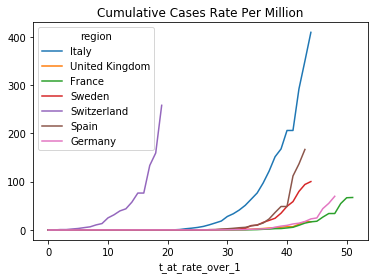

In [43]:
data.query('t_at_rate_over_1 >= 0').pivot(
    index='t_at_rate_over_1', 
    columns='region', 
    values='cumulative_confirmed_rate_per_million'
)[eu_countries].plot(logy=False, title='Cumulative Cases Rate Per Million')

In [44]:
data.query('region=="United Kingdom"')

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
2470,United Kingdom,2020-01-31,2,2,0,0,2,2,0,0,...,0.030080,0.030080,0.000000,0.000000,0.030080,0.030080,0.000000,0.000000,0,0.0
2471,United Kingdom,2020-02-01,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.0
2472,United Kingdom,2020-02-02,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,2.0
2473,United Kingdom,2020-02-03,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3.0
2474,United Kingdom,2020-02-04,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,4.0
2475,United Kingdom,2020-02-05,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5,5.0
2476,United Kingdom,2020-02-06,2,2,0,0,0,0,0,0,...,0.030080,0.030080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,6.0
2477,United Kingdom,2020-02-07,3,3,0,0,1,1,0,0,...,0.045120,0.045120,0.000000,0.000000,0.015040,0.015040,0.000000,0.000000,7,7.0
2478,United Kingdom,2020-02-08,3,3,0,0,0,0,0,0,...,0.045120,0.045120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,8.0
2479,United Kingdom,2020-02-09,3,3,0,0,0,0,0,0,...,0.045120,0.045120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,9.0


In [110]:
def logistic_function(t, t_mu, k, L):
    return L / (1 + np.exp(-k * (t - t_mu)))


def loss_fn(params, t, y):
    t_mu, k, L = params
    p = logistic_function(t, t_mu, k, L)
    
    return np.mean(np.square(y - p))

In [46]:
def loss_fn(params, t, y):
    t_mu, k, L = params
    p = logistic_function(t, t_mu, k, L)
    
    return -np.mean(y/L * np.log(p / L) + (1 - y/L) * np.log(1 - p/L))

def loss_fn_grad(params, t, y):
    t_mu, k, L = params
    dL = k * y * (t_mu - t) / (L ** 2)
    

In [111]:
params = (5, 3, 1e6)

region = "Italy"
dt = data.query('region=="{}"'.format(region))
t = dt['t'].values
y = dt['cumulative_confirmed_rate_per_million'].values

In [112]:
result = optimize.minimize(loss_fn, (40, 1, 400), args=(t, y), 
                           bounds=[(0, None), (0, None), (y.max(), 1e6)], 
                           options={'ftol': 1e-8, 'gtol': 1e-8, 'eps': 1e-8, 'iprint': 1}
                          )

result

      fun: 40.588090883427824
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.19571916e-02,  1.04579172e+00, -5.75539616e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 48
   status: 0
  success: True
        x: array([5.12809134e+01, 2.04951973e-01, 2.22195745e+03])

In [113]:
dt['date'].min() + timedelta(days=41)

Timestamp('2020-03-12 00:00:00')

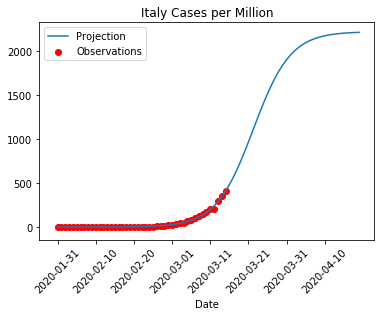

In [114]:
ts = np.arange(80)
plt.plot(logistic_function(ts, *result['x']), label='Projection')
plt.scatter(t, y, color='red', label='Observations')
plt.legend()
plt.title('{} Cases per Million'.format(region))
plt.xlabel('Date')
dates = pd.date_range(start=dt['date'].min(), periods=80)
p = plt.xticks(ticks=ts[::10], labels=dates.date[::10], rotation=45)

In [115]:
def train_regional_logistic_model(region, params=(10, 1, 10), bounds=None):
    dt = data.query('region=="{}"'.format(region))
    t = dt['t'].values
    y = dt['cumulative_confirmed_rate_per_million'].values
    
    if bounds is None:
        bounds = [(0, None), (0, None), (y.max(), 1e6)]
        
    result = optimize.minimize(
        loss_fn, params, args=(t, y), bounds=bounds, 
        options={'ftol': 1e-8, 'gtol': 1e-8, 'eps': 1e-8}
    )
    return result

In [116]:
def train_and_plot_regional_model(region, params=(10, 1, 10), bounds=None, T=80):
    result = train_regional_logistic_model(region, params=params, bounds=bounds)
    ts = np.arange(T)
    plt.plot(logistic_function(ts, *result['x']), label='Projection')
    plt.scatter(t, y, color='red', label='Observations')
    plt.legend()
    plt.title('{} Cases per Million'.format(region))
    plt.xlabel('Date')
    dates = pd.date_range(start=dt['date'].min(), periods=80)
    p = plt.xticks(ticks=ts[::10], labels=dates.date[::10], rotation=45)
    
    return result

      fun: 40.588090883427824
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.19571916e-02,  1.04579172e+00, -5.75539616e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 240
      nit: 48
   status: 0
  success: True
        x: array([5.12809134e+01, 2.04951973e-01, 2.22195745e+03])
Inflection Point: 51.28
Logistic Growth Parameter: 0.20
Inital Exponential Growth Rate: 1.23
Carrying Capacity: 2221.96


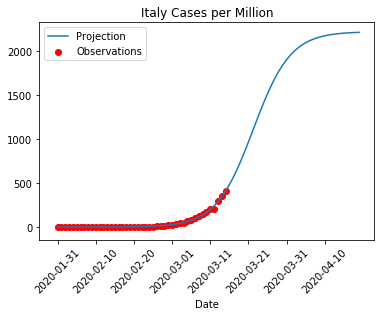

In [123]:
result = train_and_plot_regional_model('Italy', params=(40, 1, 400), 
                                       bounds=None)

print(result)
print((
     "Inflection Point: {x[0]:.2f}\n"
     "Logistic Growth Parameter: {x[1]:.2f}\n"
     "Inital Exponential Growth Rate: {gr:.2f}\n"
     "Carrying Capacity: {x[2]:.2f}"
    ).format(x=np.round(result['x'], 2), gr=np.exp(result['x'][1])))

In [125]:
data.query('region == "Canada"')

,region,date,cumulative_active,cumulative_confirmed,cumulative_deaths,cumulative_recovered,cases_active,cases_confirmed,cases_deaths,cases_recovered,...,cumulative_active_rate_per_million,cumulative_confirmed_rate_per_million,cumulative_deaths_rate_per_million,cumulative_recovered_rate_per_million,cases_active_rate_per_million,cases_confirmed_rate_per_million,cases_deaths_rate_per_million,cases_recovered_rate_per_million,t,t_at_rate_over_1
393,Canada,2020-01-26,1,1,0,0,1,1,0,0,...,0.026984,0.026984,0.000000,0.000000,0.026984,0.026984,0.000000,0.000000,0,0.0
394,Canada,2020-01-27,1,1,0,0,0,0,0,0,...,0.026984,0.026984,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.0
395,Canada,2020-01-28,2,2,0,0,1,1,0,0,...,0.053968,0.053968,0.000000,0.000000,0.026984,0.026984,0.000000,0.000000,2,2.0
396,Canada,2020-01-29,2,2,0,0,0,0,0,0,...,0.053968,0.053968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,3.0
397,Canada,2020-01-30,2,2,0,0,0,0,0,0,...,0.053968,0.053968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,4.0
398,Canada,2020-01-31,4,4,0,0,2,2,0,0,...,0.107936,0.107936,0.000000,0.000000,0.053968,0.053968,0.000000,0.000000,5,5.0
399,Canada,2020-02-01,4,4,0,0,0,0,0,0,...,0.107936,0.107936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6,6.0
400,Canada,2020-02-02,4,4,0,0,0,0,0,0,...,0.107936,0.107936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7,7.0
401,Canada,2020-02-03,4,4,0,0,0,0,0,0,...,0.107936,0.107936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8,8.0
402,Canada,2020-02-04,4,4,0,0,0,0,0,0,...,0.107936,0.107936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,9.0


In [105]:
result

      fun: 5.141766124509111
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.        , 30.06176676,  1.93569649])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 12
      nit: 2
   status: 0
  success: True
        x: array([12.08697616,  0.        ,  5.34285246])

In [92]:
dt['date'].min() + timedelta(days=50)

Timestamp('2020-03-21 00:00:00')

In [64]:
result

      fun: 0.007966648273911879
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.27418517e-06, -7.92196170e-05, -4.67629407e-06])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 192
      nit: 34
   status: 0
  success: True
        x: array([55.56471741,  0.11041908, 14.92873675])